In [1]:
import pandas as pd
import numpy as np
import json
import gzip
import os
import os.path
from os import listdir
import multiprocessing
from tqdm import tqdm
import mmap
from multiprocessing import Pool
import seaborn as sns

In [5]:
small_test = pd.read_csv('../../src/data/schemafiltereddata/TrainTestTables/Small/STest_Files.csv')
small_test

,Unnamed: 0,filename,Class,num_rows,num_columns,num_columns_selected,num_NAs,percentage_col_NA,percentage_table_NA,sum_NA_sel_col,...,Restaurant_openinghoursspecification,Restaurant_pricerange,Restaurant_servescuisine,Restaurant_telephone,TVEpisode_episodenumber,TVEpisode_name,TVEpisode_partofseries,Small,Medium,Large
0,106,Book_calamo.com_September2020.json.gz,Book,15746.0,10.0,7.0,6174,0.193891,0.056014,43218.0,...,0,0,0,0,0,0,0,0.0,0.0,1.0
1,201,Book_follasnovas.com_September2020.json.gz,Book,1167.0,7.0,5.0,181,0.152528,0.031020,905.0,...,0,0,0,0,0,0,0,0.0,0.0,1.0
2,472,Book_norfolk-tree-surgeon.co.uk_September2020....,Book,235.0,11.0,9.0,0,0.000000,0.000000,0.0,...,0,0,0,0,0,0,0,0.0,0.0,1.0
3,510,Book_pirtukakurdi.com_September2020.json.gz,Book,993.0,8.0,5.0,218,0.188318,0.043907,1090.0,...,0,0,0,0,0,0,0,0.0,0.0,1.0
4,572,Book_slkbali-lollypop.com_September2020.json.gz,Book,52.0,13.0,9.0,7,0.057692,0.014957,63.0,...,0,0,0,0,0,0,0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389,53789,Restaurant_laterrassedujardin.com_September202...,Restaurant,22.0,13.0,9.0,11,0.363636,0.055556,99.0,...,1,1,1,1,0,0,0,1.0,0.0,0.0
390,53835,Restaurant_nashvilledelivers.com_September2020...,Restaurant,94.0,9.0,6.0,2,0.021277,0.003546,12.0,...,0,1,1,1,0,0,0,0.0,1.0,0.0
391,53935,Restaurant_tahoesbest.com_September2020.json.gz,Restaurant,32.0,10.0,7.0,5,0.093750,0.022321,35.0,...,0,1,1,1,0,0,0,1.0,0.0,0.0
392,54035,TVEpisode_erosnow.com_September2020.json.gz,TVEpisode,21.0,10.0,2.0,0,0.000000,0.000000,0.0,...,0,0,0,0,0,1,1,1.0,0.0,0.0


In [9]:
anzahl = small_test.value_counts('Class')
anzahl

Class
Product           169
MusicRecording     46
Event              39
CreativeWork       35
Recipe             31
Person             28
LocalBusiness      21
Hotel               7
Place               6
Book                5
Restaurant          3
MusicAlbum          2
TVEpisode           2
dtype: int64

In [10]:
medium_test = pd.read_csv('../../src/data/schemafiltereddata/TrainTestTables/Medium/MTest_Files.csv')
medium_test

,Unnamed: 0,filename,Class,num_rows,num_columns,num_columns_selected,num_NAs,percentage_col_NA,percentage_table_NA,sum_NA_sel_col,...,Restaurant_openinghoursspecification,Restaurant_pricerange,Restaurant_servescuisine,Restaurant_telephone,TVEpisode_episodenumber,TVEpisode_name,TVEpisode_partofseries,Small,Medium,Large
0,38,Book_atlaskitap.com_September2020.json.gz,Book,2015.0,8.0,5.0,1,0.000496,0.000099,5.0,...,0,0,0,0,0,0,0,0.0,0.0,1.0
1,41,Book_auth-e83.co.uk_September2020.json.gz,Book,947.0,12.0,9.0,0,0.000000,0.000000,0.0,...,0,0,0,0,0,0,0,0.0,0.0,1.0
2,61,Book_berghahnbooks.com_September2020.json.gz,Book,697.0,12.0,9.0,6,0.002869,0.000956,54.0,...,0,0,0,0,0,0,0,0.0,0.0,1.0
3,79,Book_boldtypebooks.com_September2020.json.gz,Book,105.0,12.0,7.0,7,0.057143,0.009524,49.0,...,0,0,0,0,0,0,0,0.0,1.0,0.0
4,106,Book_calamo.com_September2020.json.gz,Book,15746.0,10.0,7.0,6174,0.193891,0.056014,43218.0,...,0,0,0,0,0,0,0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1954,54036,TVEpisode_ezfilm.net_September2020.json.gz,TVEpisode,101.0,5.0,2.0,0,0.000000,0.000000,0.0,...,0,0,0,0,1,1,0,0.0,1.0,0.0
1955,54055,TVEpisode_grnrngr.com_September2020.json.gz,TVEpisode,910.0,7.0,3.0,0,0.000000,0.000000,0.0,...,0,0,0,0,1,1,1,0.0,0.0,1.0
1956,54118,TVEpisode_semhade.com_September2020.json.gz,TVEpisode,89.0,5.0,2.0,0,0.000000,0.000000,0.0,...,0,0,0,0,1,1,0,0.0,1.0,0.0
1957,54123,TVEpisode_sinefy.net_September2020.json.gz,TVEpisode,71.0,5.0,2.0,13,0.183099,0.091549,26.0,...,0,0,0,0,1,1,0,0.0,1.0,0.0


In [11]:
anzahl1 = medium_test.value_counts('Class')
anzahl1

Class
Product           848
MusicRecording    221
Event             200
CreativeWork      177
Recipe            156
Person            144
LocalBusiness      94
Place              33
Hotel              32
Book               23
Restaurant         16
MusicAlbum          8
TVEpisode           7
dtype: int64

In [2]:
large_test = pd.read_csv('../../src/data/schemafiltereddata/TrainTestTables/Large/Test_Files.csv')
large_test

,Unnamed: 0,filename,Class,num_rows,num_columns,num_columns_selected,num_NAs,percentage_col_NA,percentage_table_NA,sum_NA_sel_col,...,Restaurant_openinghoursspecification,Restaurant_pricerange,Restaurant_servescuisine,Restaurant_telephone,TVEpisode_episodenumber,TVEpisode_name,TVEpisode_partofseries,Small,Medium,Large
0,1,Book_19shuwu.com_September2020.json.gz,Book,250.0,8.0,5.0,0,0.000000,0.000000,0.0,...,0,0,0,0,0,0,0,0.0,0.0,1.0
1,7,Book_4thestate.co.uk_September2020.json.gz,Book,1336.0,10.0,6.0,523,0.391467,0.065245,3138.0,...,0,0,0,0,0,0,0,0.0,0.0,1.0
2,9,Book_80mundos.com_September2020.json.gz,Book,2748.0,10.0,7.0,696,0.129185,0.036182,4872.0,...,0,0,0,0,0,0,0,0.0,0.0,1.0
3,21,Book_alexanderstreet.com_September2020.json.gz,Book,197.0,11.0,5.0,146,0.446701,0.148223,730.0,...,0,0,0,0,0,0,0,0.0,0.0,1.0
4,28,Book_apress.com_September2020.json.gz,Book,399.0,8.0,5.0,124,0.308271,0.062155,620.0,...,0,0,0,0,0,0,0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9750,54165,TVEpisode_univision.com_September2020.json.gz,TVEpisode,3150.0,5.0,2.0,0,0.000000,0.000000,0.0,...,0,0,0,0,1,1,0,0.0,0.0,1.0
9751,54174,TVEpisode_votenova.org_September2020.json.gz,TVEpisode,55.0,9.0,2.0,0,0.000000,0.000000,0.0,...,0,0,0,0,0,1,1,0.0,1.0,0.0
9752,54176,TVEpisode_watermarkthefilm.com_September2020.j...,TVEpisode,40.0,9.0,2.0,0,0.000000,0.000000,0.0,...,0,0,0,0,0,1,1,1.0,0.0,0.0
9753,54182,TVEpisode_ww2d.org_September2020.json.gz,TVEpisode,54.0,8.0,2.0,0,0.000000,0.000000,0.0,...,0,0,0,0,0,1,1,0.0,1.0,0.0


In [3]:
anzahl2 = large_test.value_counts('Class')
anzahl2

Class
Product           4239
MusicRecording    1103
Event             1000
CreativeWork       876
Recipe             774
Person             694
LocalBusiness      478
Place              161
Hotel              153
Book               119
Restaurant          78
MusicAlbum          44
TVEpisode           36
dtype: int64

In [2]:
path = '/work-ceph/bizer-tp2021/data_integration_using_deep_learning/src/data/data/CSV_files'
tables = pd.read_csv(path + '/all_files_cleaned.csv')
tables = tables.drop(columns={'Unnamed: 0'})
columns_sorted = tables.groupby('filename')['column_name'].apply(list).reset_index(name='listofcolumns')
columns_sorted.filename = columns_sorted.filename.str.split('_', expand = True)
columns_sorted.index = columns_sorted['filename']
columns_sorted

,filename,listofcolumns
filename,,
Book,Book,"[name, author, isbn, publisher, offers, datepu..."
CreativeWork,CreativeWork,"[headline, author, datepublished, datemodified..."
Event,Event,"[name, enddate, location, performer, organizer..."
Hotel,Hotel,"[name, address, telephone, pricerange, geo, ag..."
LocalBusiness,LocalBusiness,"[name, address, telephone, geo, pricerange, ag..."
MusicAlbum,MusicAlbum,"[name, byartist, track, numtracks]"
MusicRecording,MusicRecording,"[name, duration, byartist, inalbum, datepublis..."
Person,Person,"[mainentityofpage, jobtitle, birthdate, givenn..."
Place,Place,"[name, geo, telephone, sameas, openinghoursspe..."


In [3]:
test_set = pd.read_csv('../../src/data/schemafiltereddata/TrainTestTables/4500_test_cleaned.csv')
test_set

,Unnamed: 0,filename,Class,num_rows,num_columns,num_columns_selected,num_NAs,percentage_col_NA,percentage_table_NA,sum_NA_sel_col,...,Restaurant_openinghoursspecification,Restaurant_pricerange,Restaurant_servescuisine,Restaurant_telephone,TVEpisode_episodenumber,TVEpisode_name,TVEpisode_partofseries,Small,Medium,Large
0,28,Book_apress.com_September2020.json.gz,Book,399.0,8.0,5.0,124,0.308271,0.062155,620.0,...,0,0,0,0,0,0,0,0.0,0.0,1.0
1,29,Book_arcadiapublishing.com_September2020.json.gz,Book,3199.0,11.0,8.0,0,0.000000,0.000000,0.0,...,0,0,0,0,0,0,0,0.0,0.0,1.0
2,46,Book_babcockbooks.com_September2020.json.gz,Book,138.0,8.0,5.0,102,0.347826,0.147826,510.0,...,0,0,0,0,0,0,0,0.0,1.0,0.0
3,61,Book_berghahnbooks.com_September2020.json.gz,Book,697.0,12.0,9.0,6,0.002869,0.000956,54.0,...,0,0,0,0,0,0,0,0.0,0.0,1.0
4,79,Book_boldtypebooks.com_September2020.json.gz,Book,105.0,12.0,7.0,7,0.057143,0.009524,49.0,...,0,0,0,0,0,0,0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4549,54101,TVEpisode_putlockerapp.com_September2020.json.gz,TVEpisode,962.0,9.0,2.0,0,0.000000,0.000000,0.0,...,0,0,0,0,0,1,1,0.0,0.0,1.0
4550,54110,TVEpisode_robforthesecond.com_September2020.js...,TVEpisode,21.0,9.0,2.0,0,0.000000,0.000000,0.0,...,0,0,0,0,0,1,1,1.0,0.0,0.0
4551,54143,TVEpisode_thefmovies.com_September2020.json.gz,TVEpisode,254.0,9.0,2.0,0,0.000000,0.000000,0.0,...,0,0,0,0,0,1,1,0.0,0.0,1.0
4552,54176,TVEpisode_watermarkthefilm.com_September2020.j...,TVEpisode,40.0,9.0,2.0,0,0.000000,0.000000,0.0,...,0,0,0,0,0,1,1,1.0,0.0,0.0


In [15]:
liste  = list(test_set.iloc[:,10:])
#liste2 = list(test_set.iloc[:,10:])
#liste = liste + liste2
liste

['Book_aggregaterating',
 'Book_author',
 'Book_bookedition',
 'Book_bookformat',
 'Book_datepublished',
 'Book_genre',
 'Book_inlanguage',
 'Book_isbn',
 'Book_name',
 'Book_numberofpages',
 'Book_offers',
 'Book_publisher',
 'CreativeWork_aggregaterating',
 'CreativeWork_alternativeheadline',
 'CreativeWork_articlebody',
 'CreativeWork_author',
 'CreativeWork_commentcount',
 'CreativeWork_copyrightholder',
 'CreativeWork_copyrightyear',
 'CreativeWork_creator',
 'CreativeWork_datecreated',
 'CreativeWork_datemodified',
 'CreativeWork_datepublished',
 'CreativeWork_genre',
 'CreativeWork_headline',
 'CreativeWork_inlanguage',
 'CreativeWork_interactioncount',
 'CreativeWork_interactionstatistic',
 'CreativeWork_interactiontype',
 'CreativeWork_keywords',
 'CreativeWork_mainentityofpage',
 'CreativeWork_name',
 'CreativeWork_offers',
 'CreativeWork_publisher',
 'CreativeWork_version',
 'Event_doortime',
 'Event_duration',
 'Event_enddate',
 'Event_eventattendancemode',
 'Event_eventsta

In [52]:
test = test_set.groupby('Class').agg(lambda x : x.sum() if x.dtype=='int64' else x.head(1))
test

,Unnamed: 0,filename,num_rows,num_columns,num_columns_selected,num_NAs,percentage_col_NA,percentage_table_NA,sum_NA_sel_col,Book_aggregaterating,...,Restaurant_openinghoursspecification,Restaurant_pricerange,Restaurant_servescuisine,Restaurant_telephone,TVEpisode_episodenumber,TVEpisode_name,TVEpisode_partofseries,Small,Medium,Large
Class,,,,,,,,,,,,,,,,,,,,,
Book,9999,Book_apress.com_September2020.json.gz,399.0,8.0,5.0,7525,0.308271,0.062155,620.0,7,...,0,0,0,0,0,0,0,0.0,0.0,1.0
CreativeWork,1363293,CreativeWork_124spider.org_September2020.json.gz,444.0,8.0,5.0,3089,0.000000,0.000000,0.0,0,...,0,0,0,0,0,0,0,0.0,0.0,1.0
Event,4180331,Event_214area.com_September2020.json.gz,62.0,9.0,5.0,15236,0.145161,0.058065,90.0,0,...,0,0,0,0,0,0,0,0.0,1.0,0.0
Hotel,666510,Hotel_adriagate.com_September2020.json.gz,1018.0,8.0,3.0,1469,0.312377,0.208251,1908.0,0,...,0,0,0,0,0,0,0,0.0,0.0,1.0
LocalBusiness,2494503,LocalBusiness_360towingsolutions.com_September...,35.0,7.0,5.0,13635,0.028571,0.017143,15.0,0,...,0,0,0,0,0,0,0,1.0,0.0,0.0
MusicAlbum,322740,MusicAlbum_anjunabeats.com_September2020.json.gz,298.0,8.0,2.0,190,0.083893,0.041946,50.0,0,...,0,0,0,0,0,0,0,0.0,0.0,1.0
MusicRecording,9383013,MusicRecording_2002music.com_September2020.jso...,113.0,6.0,4.0,5332,0.176991,0.068584,124.0,0,...,0,0,0,0,0,0,0,0.0,1.0,0.0
Person,6341721,Person_970prop.com_September2020.json.gz,261.0,6.0,3.0,13002,0.000000,0.000000,0.0,0,...,0,0,0,0,0,0,0,0.0,0.0,1.0
Place,1615756,Place_airbnb.com.ar_September2020.json.gz,150.0,8.0,3.0,1526,0.280000,0.093333,126.0,0,...,0,0,0,0,0,0,0,0.0,1.0,0.0


[Text(0, 0, 'Book_name'),
 Text(1, 0, 'Book_author'),
 Text(2, 0, 'Book_publisher'),
 Text(3, 0, 'Book_isbn'),
 Text(4, 0, 'Book_datepublished'),
 Text(5, 0, 'Book_numberofpages'),
 Text(6, 0, 'Book_bookformat'),
 Text(7, 0, 'Book_offers'),
 Text(8, 0, 'Book_inlanguage'),
 Text(9, 0, 'Book_aggregaterating'),
 Text(10, 0, 'Book_genre'),
 Text(11, 0, 'Book_bookedition')]

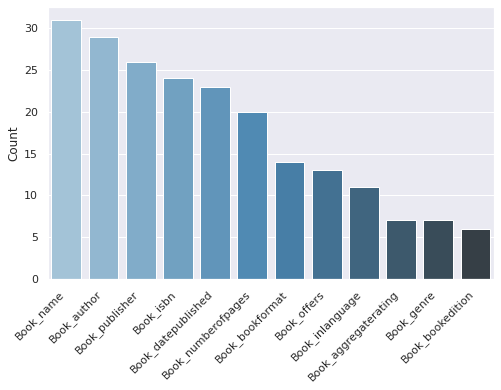

In [107]:
book = test.loc[:, test.columns.str.startswith('Book')]
book = book[book.index == 'Book']
book = book.transpose()
book.reset_index()
book = book.rename(columns={'Book':'Count'})
book = book.sort_values(by=['Count'], ascending=False)
book
sns.set(rc={'figure.figsize':(8,5)})
plot = sns.barplot(data=book, x=book.index, y='Count', palette="Blues_d")
plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right')


[Text(0, 0, 'CreativeWork_author'),
 Text(1, 0, 'CreativeWork_datemodified'),
 Text(2, 0, 'CreativeWork_headline'),
 Text(3, 0, 'CreativeWork_datepublished'),
 Text(4, 0, 'CreativeWork_publisher'),
 Text(5, 0, 'CreativeWork_name'),
 Text(6, 0, 'CreativeWork_mainentityofpage'),
 Text(7, 0, 'CreativeWork_interactionstatistic'),
 Text(8, 0, 'CreativeWork_datecreated'),
 Text(9, 0, 'CreativeWork_alternativeheadline'),
 Text(10, 0, 'CreativeWork_commentcount'),
 Text(11, 0, 'CreativeWork_interactiontype'),
 Text(12, 0, 'CreativeWork_articlebody'),
 Text(13, 0, 'CreativeWork_genre'),
 Text(14, 0, 'CreativeWork_version'),
 Text(15, 0, 'CreativeWork_inlanguage'),
 Text(16, 0, 'CreativeWork_aggregaterating'),
 Text(17, 0, 'CreativeWork_keywords'),
 Text(18, 0, 'CreativeWork_copyrightyear'),
 Text(19, 0, 'CreativeWork_copyrightholder'),
 Text(20, 0, 'CreativeWork_interactioncount'),
 Text(21, 0, 'CreativeWork_offers'),
 Text(22, 0, 'CreativeWork_creator')]

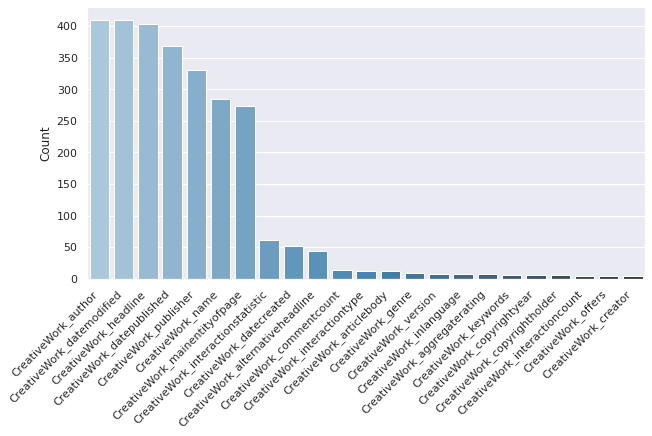

In [106]:
CW = test.loc[:, test.columns.str.startswith('CreativeWork')]
CW = CW[CW.index == 'CreativeWork']
CW = CW.transpose()
CW.reset_index()
CW = CW.rename(columns={'CreativeWork':'Count'})
CW = CW.sort_values(by=['Count'], ascending=False)
CW
sns.set(rc={'figure.figsize':(10,5)})
plot = sns.barplot(data=CW, x=CW.index, y='Count', palette="Blues_d")
plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right')


[Text(0, 0, 'Product_name'),
 Text(1, 0, 'Product_offers'),
 Text(2, 0, 'Product_brand'),
 Text(3, 0, 'Product_mpn'),
 Text(4, 0, 'Product_aggregaterating'),
 Text(5, 0, 'Product_category'),
 Text(6, 0, 'Product_review'),
 Text(7, 0, 'Product_manufacturer'),
 Text(8, 0, 'Product_itemcondition'),
 Text(9, 0, 'Product_model'),
 Text(10, 0, 'Product_releasedate'),
 Text(11, 0, 'Product_color'),
 Text(12, 0, 'Product_weight'),
 Text(13, 0, 'Product_gtin13'),
 Text(14, 0, 'Product_price'),
 Text(15, 0, 'Product_width'),
 Text(16, 0, 'Product_gtin12'),
 Text(17, 0, 'Product_height'),
 Text(18, 0, 'Product_depth'),
 Text(19, 0, 'Product_additionalproperty'),
 Text(20, 0, 'Product_gtin8'),
 Text(21, 0, 'Product_mainentityofpage'),
 Text(22, 0, 'Product_isrelatedto'),
 Text(23, 0, 'Product_gtin'),
 Text(24, 0, 'Product_shop-currency'),
 Text(25, 0, 'Product_identifier'),
 Text(26, 0, 'Product_pricecurrency'),
 Text(27, 0, 'Product_ratingvalue'),
 Text(28, 0, 'Product_reviewcount'),
 Text(29, 0,

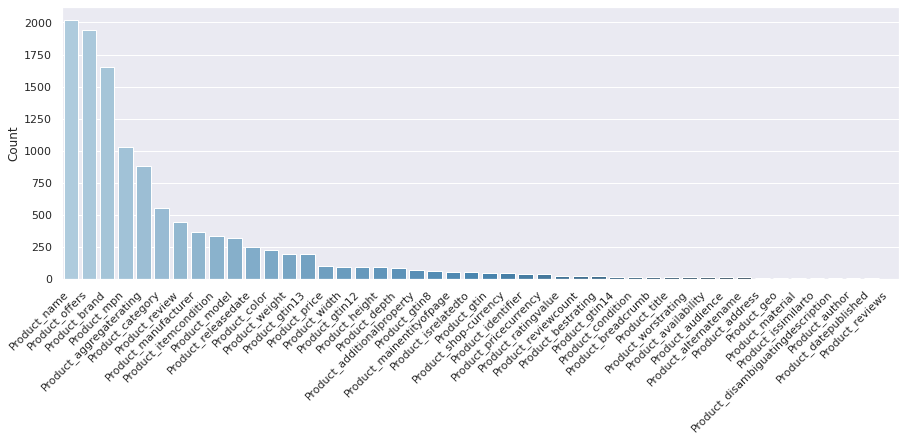

In [105]:
from matplotlib import pyplot as plt
product = test.loc[:, test.columns.str.startswith('Product')]
product = product[product.index == 'Product']
product = product.transpose()
product.reset_index()
product = product.rename(columns={'Product':'Count'})
product = product.sort_values(by=['Count'], ascending=False)
product
sns.set(rc={'figure.figsize':(15,5)})
plot = sns.barplot(data=product, x=product.index, y='Count', palette="Blues_d")
plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right')

[Text(0, 0, 'MusicRecording_name'),
 Text(1, 0, 'MusicRecording_duration'),
 Text(2, 0, 'MusicRecording_byartist'),
 Text(3, 0, 'MusicRecording_inalbum'),
 Text(4, 0, 'MusicRecording_datepublished'),
 Text(5, 0, 'MusicRecording_genre'),
 Text(6, 0, 'MusicRecording_datecreated')]

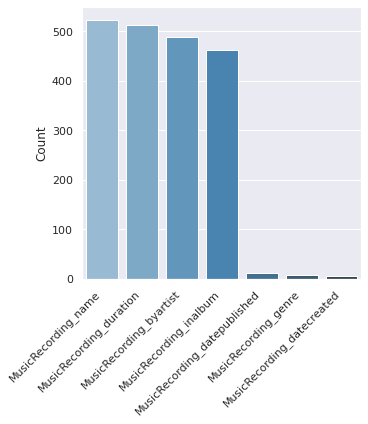

In [109]:
MusicRecording = test.loc[:, test.columns.str.startswith('MusicRecording')]
MusicRecording = MusicRecording[MusicRecording.index == 'MusicRecording']
MusicRecording = MusicRecording.transpose()
MusicRecording.reset_index()
MusicRecording = MusicRecording.rename(columns={'MusicRecording':'Count'})
MusicRecording = MusicRecording.sort_values(by=['Count'], ascending=False)
MusicRecording
sns.set(rc={'figure.figsize':(5,5)})
plot = sns.barplot(data=MusicRecording, x=MusicRecording.index, y='Count', palette="Blues_d")
plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right')

[Text(0, 0, 'Event_name'),
 Text(1, 0, 'Event_location'),
 Text(2, 0, 'Event_enddate'),
 Text(3, 0, 'Event_organizer'),
 Text(4, 0, 'Event_performer'),
 Text(5, 0, 'Event_eventstatus'),
 Text(6, 0, 'Event_eventattendancemode'),
 Text(7, 0, 'Event_performers'),
 Text(8, 0, 'Event_typicalagerange'),
 Text(9, 0, 'Event_doortime'),
 Text(10, 0, 'Event_duration')]

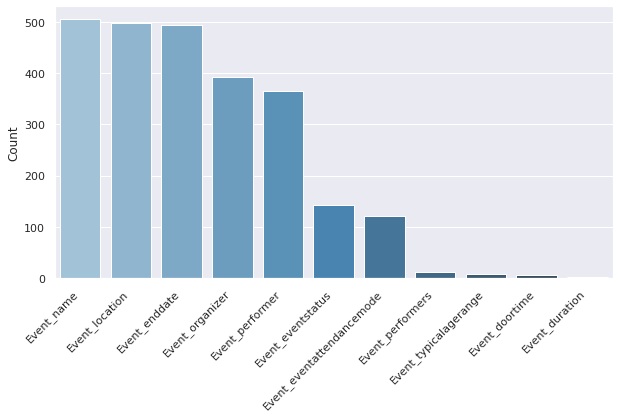

In [110]:
Event = test.loc[:, test.columns.str.startswith('Event')]
Event = Event[Event.index == 'Event']
Event = Event.transpose()
Event.reset_index()
Event = Event.rename(columns={'Event':'Count'})
Event = Event.sort_values(by=['Count'], ascending=False)
Event
sns.set(rc={'figure.figsize':(10,5)})
plot = sns.barplot(data=Event, x=Event.index, y='Count', palette="Blues_d")
plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right')

[Text(0, 0, 'Recipe_name'),
 Text(1, 0, 'Recipe_recipeinstructions'),
 Text(2, 0, 'Recipe_author'),
 Text(3, 0, 'Recipe_recipeingredient'),
 Text(4, 0, 'Recipe_recipeyield'),
 Text(5, 0, 'Recipe_preptime'),
 Text(6, 0, 'Recipe_cooktime'),
 Text(7, 0, 'Recipe_datepublished'),
 Text(8, 0, 'Recipe_totaltime'),
 Text(9, 0, 'Recipe_recipecategory'),
 Text(10, 0, 'Recipe_recipecuisine'),
 Text(11, 0, 'Recipe_keywords'),
 Text(12, 0, 'Recipe_aggregaterating'),
 Text(13, 0, 'Recipe_nutrition'),
 Text(14, 0, 'Recipe_mainentityofpage'),
 Text(15, 0, 'Recipe_ispartof'),
 Text(16, 0, 'Recipe_ingredients'),
 Text(17, 0, 'Recipe_performtime'),
 Text(18, 0, 'Recipe_cookingmethod'),
 Text(19, 0, 'Recipe_suitablefordiet'),
 Text(20, 0, 'Recipe_datemodified'),
 Text(21, 0, 'Recipe_review'),
 Text(22, 0, 'Recipe_publisher'),
 Text(23, 0, 'Recipe_headline')]

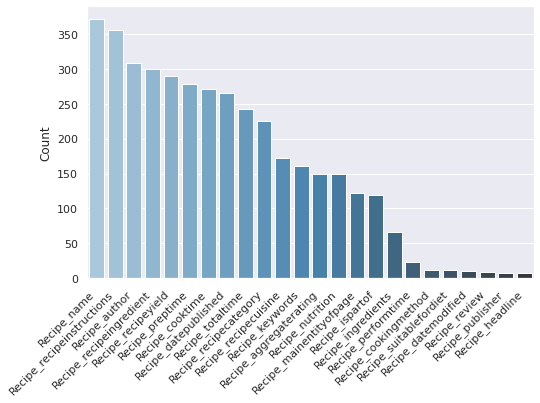

In [115]:
Recipe = test.loc[:, test.columns.str.startswith('Recipe')]
Recipe = Recipe[Recipe.index == 'Recipe']
Recipe = Recipe.transpose()
Recipe.reset_index()
Recipe = Recipe.rename(columns={'Recipe':'Count'})
Recipe = Recipe.sort_values(by=['Count'], ascending=False)
Recipe
sns.set(rc={'figure.figsize':(8,5)})
plot = sns.barplot(data=Recipe, x=Recipe.index, y='Count', palette="Blues_d")
plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right')

[Text(0, 0, 'Person_birthdate'),
 Text(1, 0, 'Person_givenname'),
 Text(2, 0, 'Person_familyname'),
 Text(3, 0, 'Person_jobtitle'),
 Text(4, 0, 'Person_deathdate'),
 Text(5, 0, 'Person_additionalname'),
 Text(6, 0, 'Person_telephone'),
 Text(7, 0, 'Person_gender'),
 Text(8, 0, 'Person_email'),
 Text(9, 0, 'Person_worksfor'),
 Text(10, 0, 'Person_height'),
 Text(11, 0, 'Person_address'),
 Text(12, 0, 'Person_nationality'),
 Text(13, 0, 'Person_affiliation'),
 Text(14, 0, 'Person_weight'),
 Text(15, 0, 'Person_homelocation'),
 Text(16, 0, 'Person_knowslanguage'),
 Text(17, 0, 'Person_makesoffer'),
 Text(18, 0, 'Person_faxnumber'),
 Text(19, 0, 'Person_contactpoint'),
 Text(20, 0, 'Person_memberof'),
 Text(21, 0, 'Person_birthplace'),
 Text(22, 0, 'Person_worklocation'),
 Text(23, 0, 'Person_sameas')]

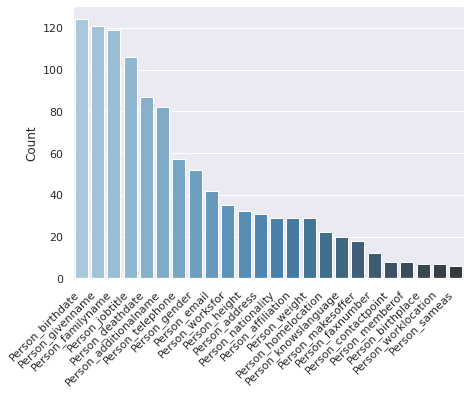

In [113]:
Person = test.loc[:, test.columns.str.startswith('Person')]
Person = Person[Person.index == 'Person']
Person = Person.transpose()
Person.reset_index()
Person = Person.rename(columns={'Person':'Count'})
Person = Person.sort_values(by=['Count'], ascending=False)
Person
sns.set(rc={'figure.figsize':(7,5)})
plot = sns.barplot(data=Person, x=Person.index, y='Count', palette="Blues_d")
plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right')

[Text(0, 0, 'LocalBusiness_name'),
 Text(1, 0, 'LocalBusiness_address'),
 Text(2, 0, 'LocalBusiness_telephone'),
 Text(3, 0, 'LocalBusiness_pricerange'),
 Text(4, 0, 'LocalBusiness_geo'),
 Text(5, 0, 'LocalBusiness_email'),
 Text(6, 0, 'LocalBusiness_aggregaterating'),
 Text(7, 0, 'LocalBusiness_openinghours'),
 Text(8, 0, 'LocalBusiness_openinghoursspecification'),
 Text(9, 0, 'LocalBusiness_contactpoint'),
 Text(10, 0, 'LocalBusiness_sameas'),
 Text(11, 0, 'LocalBusiness_review'),
 Text(12, 0, 'LocalBusiness_faxnumber'),
 Text(13, 0, 'LocalBusiness_legalname'),
 Text(14, 0, 'LocalBusiness_addresslocality'),
 Text(15, 0, 'LocalBusiness_areaserved'),
 Text(16, 0, 'LocalBusiness_postalcode'),
 Text(17, 0, 'LocalBusiness_streetaddress'),
 Text(18, 0, 'LocalBusiness_addressregion'),
 Text(19, 0, 'LocalBusiness_citystatezip'),
 Text(20, 0, 'LocalBusiness_hasmap'),
 Text(21, 0, 'LocalBusiness_paymentaccepted'),
 Text(22, 0, 'LocalBusiness_location')]

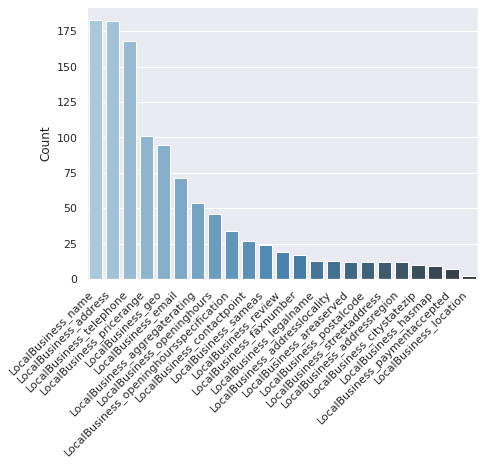

In [116]:
LocalBusiness = test.loc[:, test.columns.str.startswith('LocalBusiness')]
LocalBusiness = LocalBusiness[LocalBusiness.index == 'LocalBusiness']
LocalBusiness = LocalBusiness.transpose()
LocalBusiness.reset_index()
LocalBusiness = LocalBusiness.rename(columns={'LocalBusiness':'Count'})
LocalBusiness = LocalBusiness.sort_values(by=['Count'], ascending=False)
LocalBusiness
sns.set(rc={'figure.figsize':(7,5)})
plot = sns.barplot(data=LocalBusiness, x=LocalBusiness.index, y='Count', palette="Blues_d")
plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right')

[Text(0, 0, 'Place_geo'),
 Text(1, 0, 'Place_name'),
 Text(2, 0, 'Place_telephone'),
 Text(3, 0, 'Place_sameas'),
 Text(4, 0, 'Place_openinghoursspecification')]

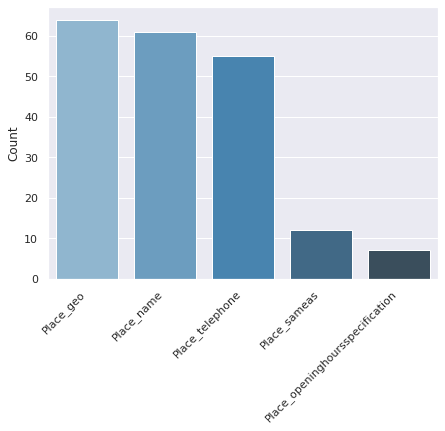

In [117]:
Place = test.loc[:, test.columns.str.startswith('Place')]
Place = Place[Place.index == 'Place']
Place = Place.transpose()
Place.reset_index()
Place = Place.rename(columns={'Place':'Count'})
Place = Place.sort_values(by=['Count'], ascending=False)
Place
sns.set(rc={'figure.figsize':(7,5)})
plot = sns.barplot(data=Place, x=Place.index, y='Count', palette="Blues_d")
plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right')

[Text(0, 0, 'Hotel_name'),
 Text(1, 0, 'Hotel_address'),
 Text(2, 0, 'Hotel_telephone'),
 Text(3, 0, 'Hotel_geo'),
 Text(4, 0, 'Hotel_pricerange'),
 Text(5, 0, 'Hotel_aggregaterating'),
 Text(6, 0, 'Hotel_starrating'),
 Text(7, 0, 'Hotel_email')]

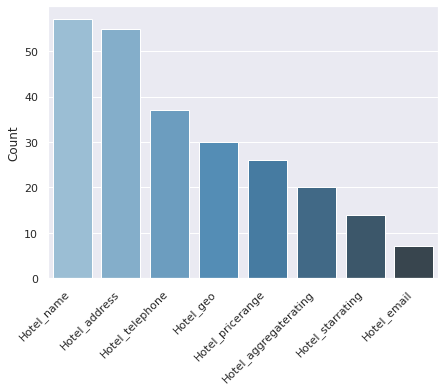

In [118]:
Hotel = test.loc[:, test.columns.str.startswith('Hotel')]
Hotel = Hotel[Hotel.index == 'Hotel']
Hotel = Hotel.transpose()
Hotel.reset_index()
Hotel = Hotel.rename(columns={'Hotel':'Count'})
Hotel = Hotel.sort_values(by=['Count'], ascending=False)
Hotel
sns.set(rc={'figure.figsize':(7,5)})
plot = sns.barplot(data=Hotel, x=Hotel.index, y='Count', palette="Blues_d")
plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right')

[Text(0, 0, 'Restaurant_address'),
 Text(1, 0, 'Restaurant_name'),
 Text(2, 0, 'Restaurant_telephone'),
 Text(3, 0, 'Restaurant_servescuisine'),
 Text(4, 0, 'Restaurant_pricerange'),
 Text(5, 0, 'Restaurant_geo'),
 Text(6, 0, 'Restaurant_openinghours'),
 Text(7, 0, 'Restaurant_aggregaterating'),
 Text(8, 0, 'Restaurant_openinghoursspecification'),
 Text(9, 0, 'Restaurant_hasmenu'),
 Text(10, 0, 'Restaurant_acceptsreservations'),
 Text(11, 0, 'Restaurant_menu')]

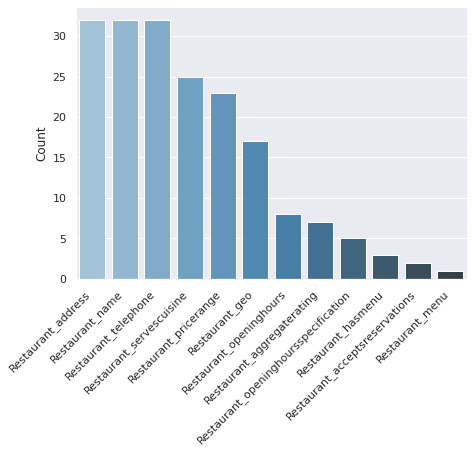

In [119]:
Restaurant = test.loc[:, test.columns.str.startswith('Restaurant')]
Restaurant = Restaurant[Restaurant.index == 'Restaurant']
Restaurant = Restaurant.transpose()
Restaurant.reset_index()
Restaurant = Restaurant.rename(columns={'Restaurant':'Count'})
Restaurant = Restaurant.sort_values(by=['Count'], ascending=False)
Restaurant
sns.set(rc={'figure.figsize':(7,5)})
plot = sns.barplot(data=Restaurant, x=Restaurant.index, y='Count', palette="Blues_d")
plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right')

[Text(0, 0, 'MusicAlbum_name'),
 Text(1, 0, 'MusicAlbum_byartist'),
 Text(2, 0, 'MusicAlbum_track'),
 Text(3, 0, 'MusicAlbum_numtracks')]

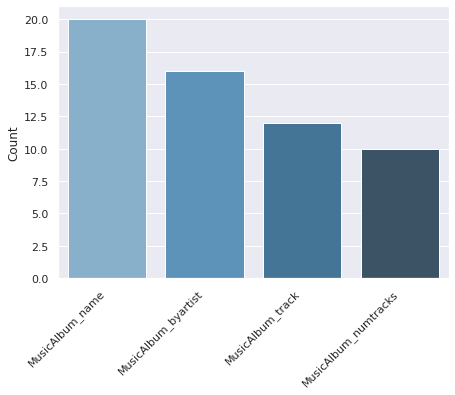

In [120]:
MusicAlbum = test.loc[:, test.columns.str.startswith('MusicAlbum')]
MusicAlbum = MusicAlbum[MusicAlbum.index == 'MusicAlbum']
MusicAlbum = MusicAlbum.transpose()
MusicAlbum.reset_index()
MusicAlbum = MusicAlbum.rename(columns={'MusicAlbum':'Count'})
MusicAlbum = MusicAlbum.sort_values(by=['Count'], ascending=False)
MusicAlbum
sns.set(rc={'figure.figsize':(7,5)})
plot = sns.barplot(data=MusicAlbum, x=MusicAlbum.index, y='Count', palette="Blues_d")
plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right')

[Text(0, 0, 'TVEpisode_name'),
 Text(1, 0, 'TVEpisode_partofseries'),
 Text(2, 0, 'TVEpisode_episodenumber')]

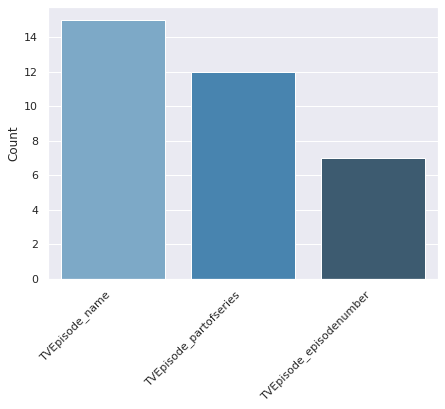

In [121]:
TVEpisode = test.loc[:, test.columns.str.startswith('TVEpisode')]
TVEpisode = TVEpisode[TVEpisode.index == 'TVEpisode']
TVEpisode = TVEpisode.transpose()
TVEpisode.reset_index()
TVEpisode = TVEpisode.rename(columns={'TVEpisode':'Count'})
TVEpisode = TVEpisode.sort_values(by=['Count'], ascending=False)
TVEpisode
sns.set(rc={'figure.figsize':(7,5)})
plot = sns.barplot(data=TVEpisode, x=TVEpisode.index, y='Count', palette="Blues_d")
plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right')